In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fuel = pd.read_csv('fuel_econ.csv')

In [3]:
fuel.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


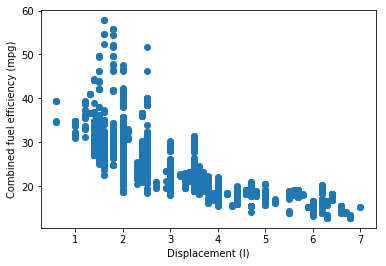

In [5]:
plt.scatter(data=fuel, x='displ', y='comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');

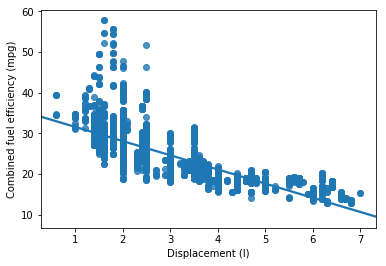

In [8]:
sns.regplot(data=fuel, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');

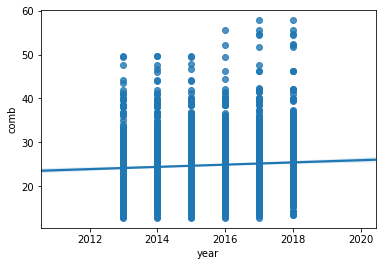

In [10]:
sns.regplot(data=fuel, x='year', y='comb');

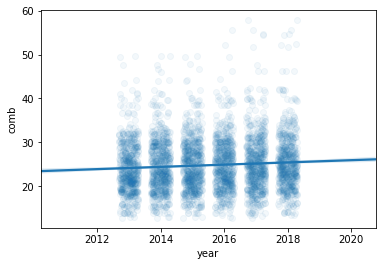

In [13]:
sns.regplot(data=fuel, x='year', y='comb', x_jitter=0.3, scatter_kws={'alpha':1/20});

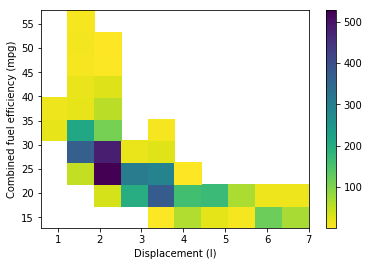

In [18]:
plt.hist2d(data=fuel, x='displ', y='comb', cmin=0.5, cmap='viridis_r')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');
plt.colorbar()

In [19]:
fuel[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


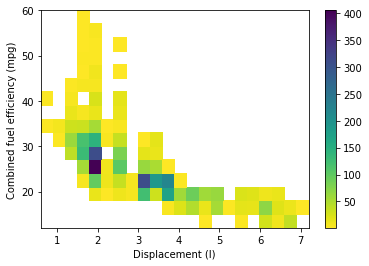

In [20]:
bins_x = np.arange(0.6,7+0.3,0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data=fuel, x='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');
plt.colorbar()

In [22]:
fuel.VClass.value_counts()

Midsize Cars        1188
Compact Cars        1122
Subcompact Cars      673
Large Cars           625
Minicompact Cars     321
Name: VClass, dtype: int64

In [23]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

In [24]:
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

In [25]:
fuel['VClass'] = fuel['VClass'].astype(vclassesasses)

In [29]:
base_color = sns.color_palette()[0]

C:\Users\davep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


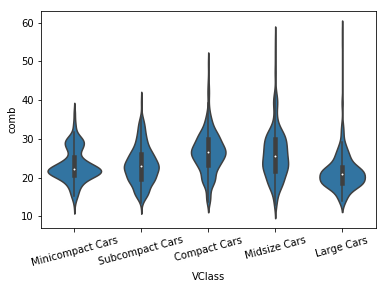

In [31]:
sns.violinplot(data=fuel, x = 'VClass', y= 'comb', color=base_color)
plt.xticks(rotation=15);

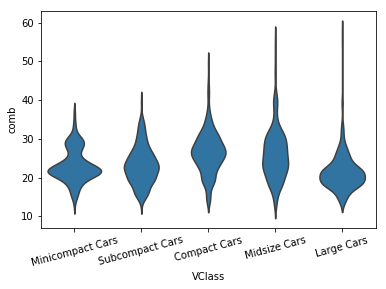

In [32]:
sns.violinplot(data=fuel, x = 'VClass', y= 'comb', color=base_color, inner = None)
plt.xticks(rotation=15);

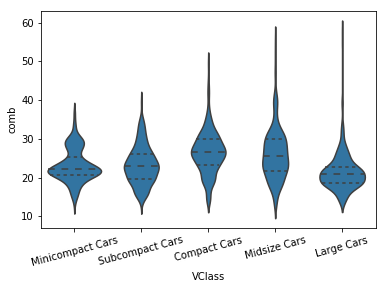

In [36]:
sns.violinplot(data=fuel, x = 'VClass', y= 'comb', color=base_color, inner = 'quartile')
plt.xticks(rotation=15);

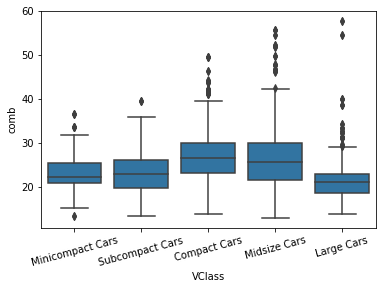

In [35]:
sns.boxplot(data=fuel, x = 'VClass', y= 'comb', color=base_color)
plt.xticks(rotation=15);

In [43]:
fuel.trans.value_counts(dropna=False)

Automatic (S8)                      814
Automatic (S6)                      739
Manual 6-spd                        658
Automatic (AM-S7)                   226
Automatic 7-spd                     212
Automatic (variable gear ratios)    178
Automatic 8-spd                     138
Automatic 6-spd                     126
Manual 5-spd                        126
Automatic (S7)                       98
Automatic (AM-S6)                    91
Manual 7-spd                         77
Automatic (AM6)                      75
Automatic (AM7)                      63
Automatic 9-spd                      62
Automatic (AV-S6)                    43
Automatic (AV-S7)                    43
Automatic 5-spd                      33
Automatic (AM-S8)                    27
Automatic 4-spd                      25
Automatic (AV-S8)                    22
Automatic (S9)                       14
Automatic (S5)                       14
Automatic (S10)                      13
Automatic (A1)                        7


In [50]:
fuel['trans_type'] = fuel.trans.apply(lambda x:x.split()[0])

In [53]:
ct_counts = fuel.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name='count')

In [54]:
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [56]:
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count')

In [57]:
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


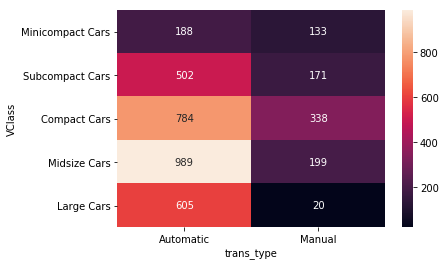

In [58]:
sns.heatmap(ct_counts, annot=True, fmt='d')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

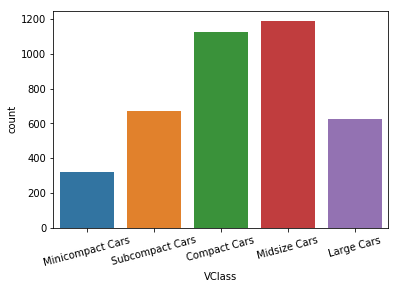

In [60]:
sns.countplot(data=fuel, x='VClass')
plt.xticks(rotation=15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

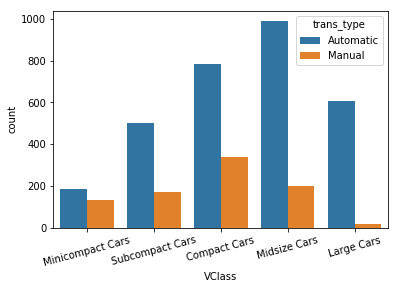

In [61]:
sns.countplot(data=fuel, x='VClass', hue='trans_type')
plt.xticks(rotation=15)

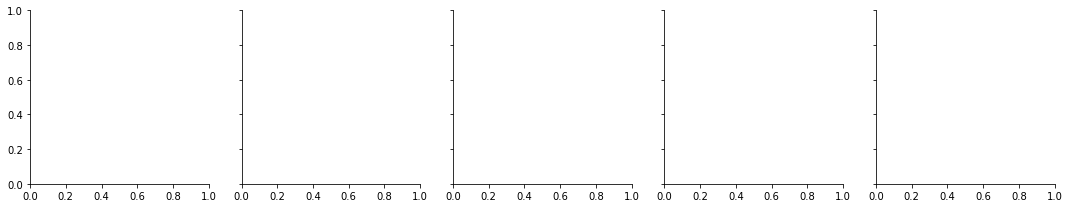

In [62]:
g = sns.FacetGrid(data = fuel, col='VClass')

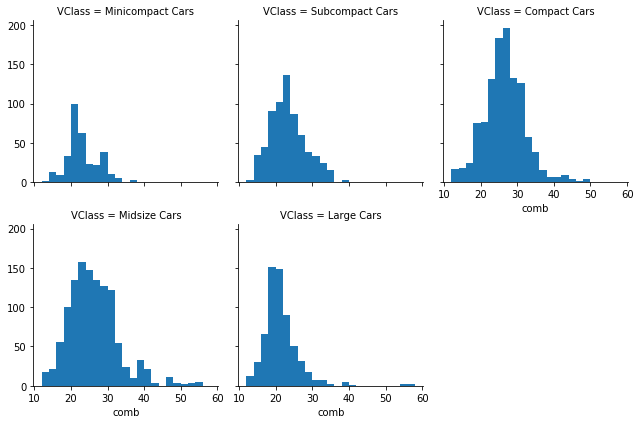

In [66]:
bins = np.arange(12,58+2,2)
g = sns.FacetGrid(data = fuel, col='VClass', col_wrap=3)
g.map(plt.hist, 'comb', bins=bins) # do not write `x =` otherwise won't work correctly

C:\Users\davep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

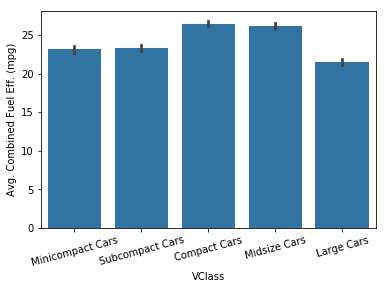

In [68]:
sns.barplot(data=fuel, x='VClass', y='comb', color=base_color)
plt.xticks(rotation = 15)
plt.ylabel("Avg. Combined Fuel Eff. (mpg)")

C:\Users\davep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

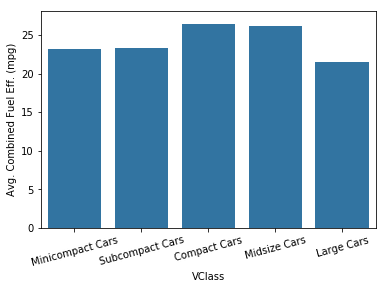

In [69]:
sns.barplot(data=fuel, x='VClass', y='comb', color=base_color, errwidth=0)
plt.xticks(rotation = 15)
plt.ylabel("Avg. Combined Fuel Eff. (mpg)")

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

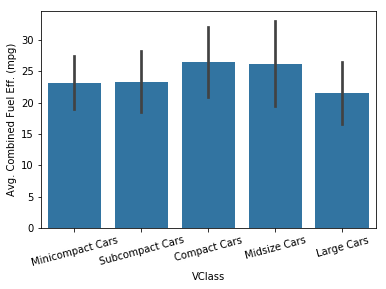

In [70]:
sns.barplot(data=fuel, x='VClass', y='comb', color=base_color, ci='sd')
plt.xticks(rotation = 15)
plt.ylabel("Avg. Combined Fuel Eff. (mpg)")

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

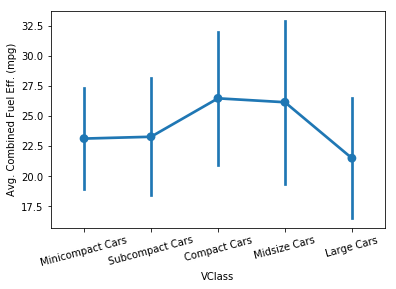

In [74]:
sns.pointplot(data=fuel, x='VClass', y='comb', ci='sd')
plt.xticks(rotation = 15)
plt.ylabel("Avg. Combined Fuel Eff. (mpg)")

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

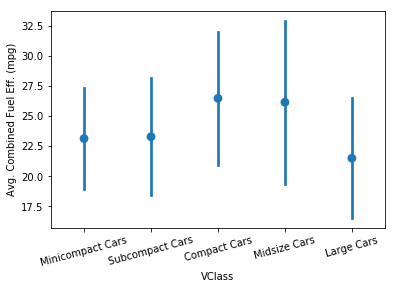

In [75]:
sns.pointplot(data=fuel, x='VClass', y='comb', ci='sd', linestyles='')
plt.xticks(rotation = 15)
plt.ylabel("Avg. Combined Fuel Eff. (mpg)")

Text(0, 0.5, 'Avg. Combined fuel eff (mpg)')

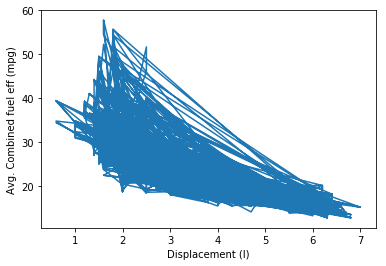

In [79]:
plt.plot(fuel.displ, fuel.comb)
plt.xlabel("Displacement (l)")
plt.ylabel("Avg. Combined fuel eff (mpg)")

Text(0, 0.5, 'Avg. Combined fuel eff (mpg)')

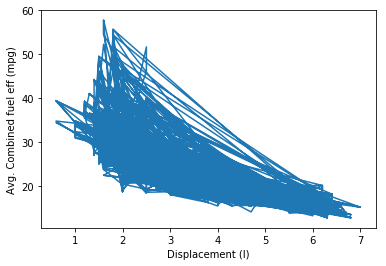

In [78]:
plt.errorbar(data=fuel, x='displ', y='comb')
plt.xlabel("Displacement (l)")
plt.ylabel("Avg. Combined fuel eff (mpg)")

* Connecting each pair of x and  y variable in order as they appear in DF, without sorting.
* Make sure for each x point we have only 1 y value

In [80]:
bins_e = np.arange(0.6, 7 + 0.2, 0.2)
bins_c = bins_e[:-1] + 0.1 # to center bin value
displ_binned = pd.cut(fuel.displ, bins_e, include_lowest=True)
comb_mean = fuel.groupby(displ_binned).comb.mean()

Text(0, 0.5, 'Avg. Combined fuel eff (mpg)')

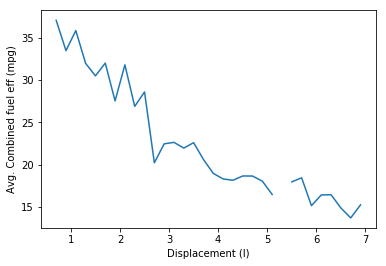

In [82]:
plt.errorbar(x=bins_c, y = comb_mean)
plt.xlabel("Displacement (l)")
plt.ylabel("Avg. Combined fuel eff (mpg)")

* To add 3rd variable, shape is good for categorical variable. Size is good for numeric variable

In [83]:
sample = np.random.choice(fuel.shape[0], 200, replace=False)

In [84]:
fuel_subset = fuel.loc[sample]

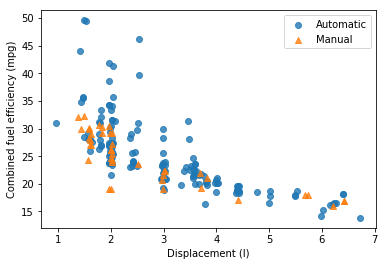

In [90]:
ttype_markers = [['Automatic', 'o'],['Manual', '^']]
for ttype, marker in ttype_markers:
    data = fuel_subset[fuel_subset.trans_type == ttype]
    sns.regplot(data=data, x='displ', y='comb', x_jitter=0.04, fit_reg=False, marker=marker, label=ttype)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');
plt.legend()

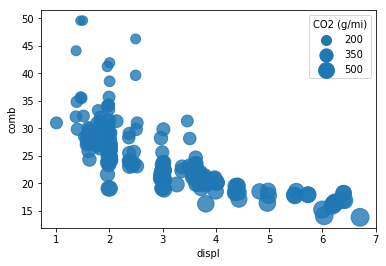

In [98]:
sns.regplot(data = fuel_subset, x = 'displ', y = 'comb', x_jitter=0.04, fit_reg=False, scatter_kws={'s':fuel_subset.co2/2})

sizes = [200,350,500]
for s in sizes:
    plt.scatter([],[],s = s/2, color=base_color, label = str(s))
plt.legend(title = 'CO2 (g/mi)')

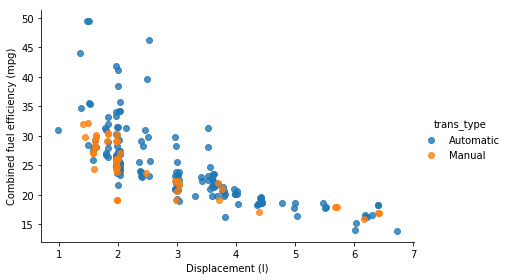

In [104]:
g = sns.FacetGrid(data=fuel_subset, hue='trans_type', hue_order=['Automatic', 'Manual'], height = 4, aspect = 1.5)
g = g.map(sns.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False)
g.add_legend()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');

* `trans_type` is nominal categorical variable, so default qualitative palette  works great.
* `VClass` is ordinal categorical variable, so we need sequnetial palette.

C:\Users\davep\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


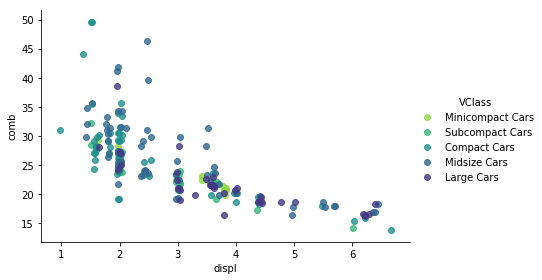

In [109]:
g = sns.FacetGrid(data=fuel_subset, hue = 'VClass', size = 4, aspect = 1.5, palette='viridis_r')
g = g.map(sns.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False)

g.add_legend();

* If we have numeric variable like `co2` we can not specify in hue.

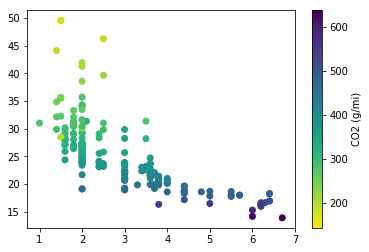

In [110]:
plt.scatter(data = fuel_subset, x = 'displ', y = 'comb', c='co2', cmap='viridis_r')
plt.colorbar(label="CO2 (g/mi)")

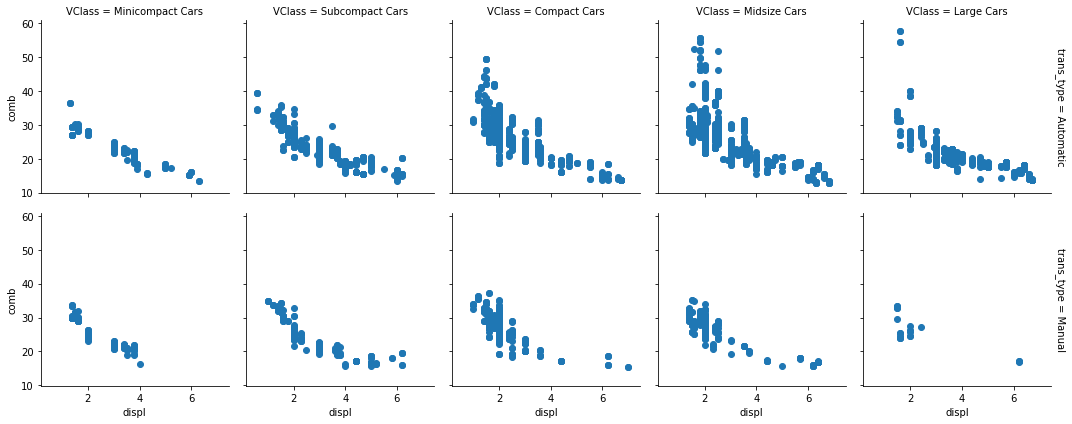

In [112]:
g = sns.FacetGrid(data = fuel, col='VClass', row = 'trans_type', margin_titles=True)
g.map(plt.scatter, 'displ', 'comb')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

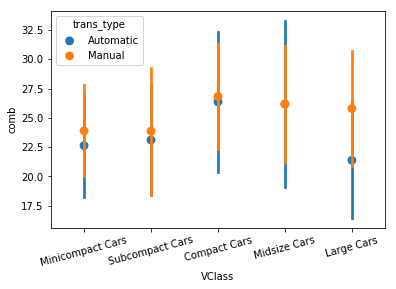

In [113]:
sns.pointplot(data=fuel, x='VClass', y='comb', hue = 'trans_type', ci='sd', linestyles='')
plt.xticks(rotation=15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

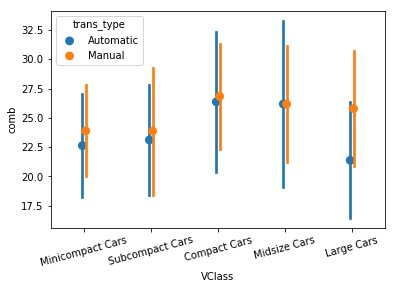

In [114]:
sns.pointplot(data=fuel, x='VClass', y='comb', hue = 'trans_type', ci='sd', linestyles='', dodge=True)
plt.xticks(rotation=15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

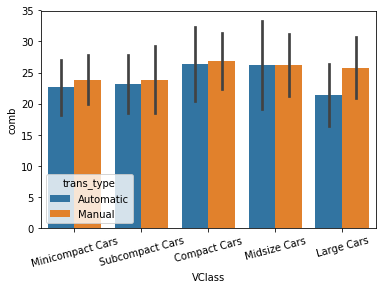

In [115]:
sns.barplot(data=fuel, x='VClass', y='comb', hue = 'trans_type', ci='sd')
plt.xticks(rotation=15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

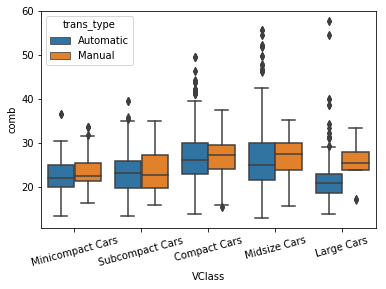

In [116]:
sns.boxplot(data=fuel, x='VClass', y='comb', hue = 'trans_type')
plt.xticks(rotation=15)

### Heatmap
* Instead color calculated on count, it is calculated as mean of 3rd variable

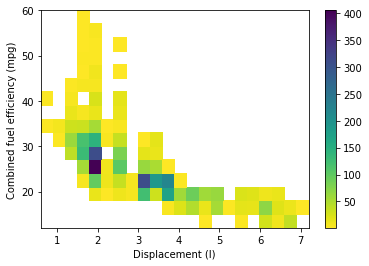

In [117]:
bins_x = np.arange(0.6,7+0.3,0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data=fuel, x='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');
plt.colorbar()

* In this heatmap we want avg CO2 output plotted instead of just count

In [120]:
displ_bins = pd.cut(fuel.displ, bins_x, right=False, include_lowest=False, labels=False).astype(int)
comb_bins = pd.cut(fuel.comb, bins_y, right=False, include_lowest=False, labels=False).astype(int)
nPoints = fuel.groupby([displ_bins, comb_bins]).size()
nPoints = nPoints.reset_index().pivot(index='displ', columns='comb').values
co2_weights = fuel.co2 / nPoints[displ_bins, comb_bins]

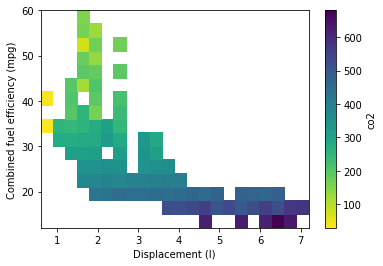

In [122]:
bins_x = np.arange(0.6,7+0.3,0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data=fuel, x='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y],
           weights=co2_weights)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel efficiency (mpg)');
plt.colorbar(label = 'co2')